In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchsummary import summary
import torch.optim as optim

from utils.data import Data
from utils.model import ResNet
from utils.training import Training

In [2]:
BATCH_SIZE = 256
VAILD_RATIO = 0.9
LR = 1e-3
EPOCHS = 80
LOG_FILE_NAME = 'res14_log.txt'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Data Preparation

In [3]:
data = Data(batch_size = BATCH_SIZE, valid_ratio = VAILD_RATIO)
train_iterator, valid_iterator = data.getTrainValData()
test_iterator = data.getTestData()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## Modeling

In [4]:
model = ResNet([2, 2, 2]).to(device)
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
     ResidualBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
    ResidualBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LR)

t = Training(
    device = device,
    model = model, 
    optimizer = optimizer, 
    criterion = criterion, 
    epochs = EPOCHS)

In [6]:
t.start_training(train_iterator, valid_iterator, logFileName = LOG_FILE_NAME)

epoch:1 | Train Loss: 2.132 | Train Acc: 23.992% | Val Loss: 1.950 | Val Acc: 31.634%
epoch:2 | Train Loss: 1.817 | Train Acc: 36.272% | Val Loss: 1.725 | Val Acc: 38.868%
epoch:3 | Train Loss: 1.658 | Train Acc: 40.955% | Val Loss: 1.619 | Val Acc: 41.542%
epoch:4 | Train Loss: 1.569 | Train Acc: 43.812% | Val Loss: 1.555 | Val Acc: 43.279%
epoch:5 | Train Loss: 1.505 | Train Acc: 46.021% | Val Loss: 1.507 | Val Acc: 44.887%
epoch:6 | Train Loss: 1.453 | Train Acc: 47.611% | Val Loss: 1.463 | Val Acc: 46.788%
epoch:7 | Train Loss: 1.408 | Train Acc: 49.335% | Val Loss: 1.429 | Val Acc: 47.652%
epoch:8 | Train Loss: 1.367 | Train Acc: 51.008% | Val Loss: 1.390 | Val Acc: 49.283%
epoch:9 | Train Loss: 1.330 | Train Acc: 52.254% | Val Loss: 1.361 | Val Acc: 50.535%
epoch:10 | Train Loss: 1.296 | Train Acc: 53.563% | Val Loss: 1.321 | Val Acc: 51.432%
epoch:11 | Train Loss: 1.265 | Train Acc: 54.835% | Val Loss: 1.293 | Val Acc: 53.610%
epoch:12 | Train Loss: 1.234 | Train Acc: 56.093% | 

In [7]:
t.test(test_iterator)

Test Loss: 0.803 | Test Acc: 72.090%


## Plot Result

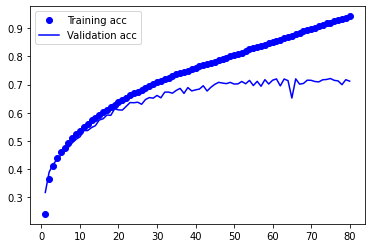

In [8]:
t.plot_acc()

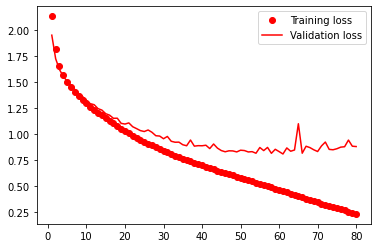

In [9]:
t.plot_loss()